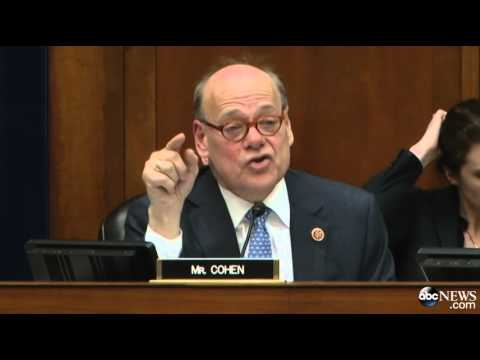

In [1]:
from IPython.display import YouTubeVideo
import os
from io import StringIO
import requests
import requests
import json
import csv
import sqlite3
import sys
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")



YouTubeVideo('wOU_3wsc35s')

In [2]:
url = 'https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv'
s = requests.get(url).text
df = pd.read_csv(StringIO(s))

In [3]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [4]:
df.tail()

,Strain,Type,Rating,Effects,Flavor,Description
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...
2350,Zoom-Pie,indica,4.6,"Hungry,Relaxed,Uplifted,Happy,Sleepy","Berry,Earthy,Pungent",Zoom Pie (also known as Zombie Pie) is a heavy...


In [5]:
df.shape

(2351, 6)

In [6]:
df.notnull().sum()

Strain         2351
Type           2351
Rating         2351
Effects        2351
Flavor         2305
Description    2318
dtype: int64

In [7]:
cols = df.columns.values.tolist()
df.rename(str.strip, axis='columns',inplace=True)
df.rename(str.lower, axis='columns',inplace=True)
df.rename(columns = lambda x: x.replace('type','strain_type')[0:],inplace = True)


In [13]:
df['flavor'] = df['flavor'].fillna('Unknown')
df['description'] = df['description'].fillna('Unknown')

In [9]:
def str_clean(x):
    df[x] = df[x].str.split(',')
    df[x] = df[x].apply(lambda x:', '.join([str(i) for i in x]))

str_clean('flavor')
str_clean('effects')

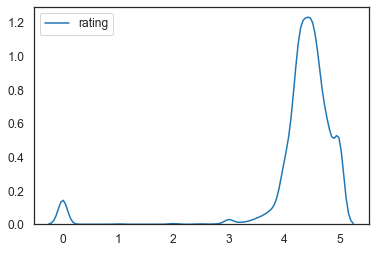

In [10]:
with sns.axes_style('white'):
    sns.kdeplot(df['rating'])

In [18]:
df['description'] = df.description.str.strip()

In [21]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [11]:
df.notnull().sum()

strain         2351
strain_type    2351
rating         2351
effects        2351
flavor         2351
description    2351
dtype: int64

In [12]:
df

,strain,strain_type,rating,effects,flavor,description
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy, Uplifted, Relaxed, Euphoric, Energetic","Earthy, Woody, Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed, Happy, Euphoric, Uplifted, Sleepy","Sweet, Berry, Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed, Sleepy, Talkative, Euphoric, Happy","Earthy, Sweet, Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed, Sleepy, Euphoric, Happy, Hungry","Sweet, Earthy, Pungent",If you’re looking to transform into a flesh-ea...
